# Contextual Bandit with Continuous Context and Reward

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder

## Hyperparameters

In creating a contextual bandit agent, we have some parameters that we need to degine, which are:
* `NUM_OF_ACTION` = number of bandit can be chosen
* `NUM_OF_CONTEXT` = number of feature affecting the reward
* `ALPHA` = coefficient that affects the bandit's tendency to explore (works by multiplying the confidence bound and increase its proportion compared to the expected reward)
* `NUM_OF_TRIALS` = how many times we take action for simulation to calculate the estimate of each bandit's return

In [2]:
NUM_OF_ACTION = 10
NUM_OF_CONTEXT = 5

ALPHA = 2

NUM_OF_TRIALS = 500

In [3]:
# Logging for regret calculation

# Best expected reward for each round
best_expected_reward = []

# Actual reward
result_history = []

# Random Exploration
random_reward = []

## Create our LinUCB Model class

$$R_t = x_t^⊤ \theta_a + \epsilon$$

In [4]:
class LinUCB_Bandit:
    
    def __init__ (self):
        # True Weight (hidden from the user)
        self.true_weight = np.random.randn(NUM_OF_CONTEXT)   # Theta_a


        self.feature_covariance_matrix = np.identity(NUM_OF_CONTEXT) # Identity matrix with a dimension of the number of action
        self.weighted_reward_matrix = np.zeros((NUM_OF_CONTEXT,1))

        # Estimation of the true weight, should get closer to the true weight by the end of the trials
        self.estimated_weight = np.zeros(NUM_OF_CONTEXT)

        self.number_pulled = 0

    def return_reward(self, context = np.random.rand(NUM_OF_CONTEXT)):

        # True weight vector for a particular arm (unknown in real applications)
        # theta_a = np.array([0.5, -0.2, 0.8, 0.3, -0.5])

        # Noise (Gaussian)
        noise = np.random.normal(0, 0.1)  

        # Compute reward
        reward = np.dot(context, self.true_weight) + noise

        self.number_pulled += 1

        # REGRET
        result_history.append(reward)

        return context, reward

    def update_ucb_matrix(self, context, reward):
        
        # Resize context array
        context_resized = np.array([context])

        # Count feature covarianve matrix (A_b)
        self.feature_covariance_matrix += np.matmul(context_resized.transpose(), context_resized)

        # Count weight sum reward (b_b)
        self.weighted_reward_matrix += reward * context_resized.transpose()

        inverted_feature_cov = np.linalg.inv(self.feature_covariance_matrix)
        self.estimated_weight = np.matmul(inverted_feature_cov, self.weighted_reward_matrix)

        # return self.feature_covariance_matrix, self.weighted_reward_matrix
    
    def calculate_ucb_value(self, context):

        # Resize context array
        context_resized = np.array([context])

        # Inverted feature covariance
        # inverted_feature_cov = c

        # Count estimated weight
        # self.estimated_weight = np.matmul(inverted_feature_cov, self.weighted_reward_matrix)

        # Expected reward of the bandit with respect to the current context
        expected_reward = np.dot(context_resized, self.estimated_weight)

        # Confidence bound
        confidence_bound = np.sqrt(np.matmul(np.matmul(context_resized, np.linalg.inv(self.feature_covariance_matrix)), context_resized.transpose()))
        
        # Getting Upper confidence bound by adding the confidence bound times by alpha (multiplier)
        upper_confidence_bound = expected_reward + (ALPHA * confidence_bound)

        return context, context_resized, np.linalg.inv(self.feature_covariance_matrix), self.estimated_weight, expected_reward, confidence_bound, upper_confidence_bound 
        # return upper_confidence_bound
        # np.linalg.inv(linUCB.feature_covariance_matrix)





In [5]:
def random_explore_log(context, bandit_list):

    random_bandit = np.random.randint(0,10)

    # Noise (Gaussian)
    noise = np.random.normal(0, 0.1)  

    # Compute reward
    # reward = np.dot(context, self.true_weight) + noise
    reward = np.dot(context, bandit_list[random_bandit].true_weight) + noise

    # REGRET
    random_reward.append(reward)

def best_expected_log(context, bandit_list):

    expected_log = []

    context_resized = np.array([context])

    for bandit in bandit_list:
        expected_log.append(np.dot(context_resized, bandit.true_weight))

    best_expectation = max(expected_log)

    best_expected_reward.append(np.float64(best_expectation))

    # return best_expectation

## Create Linear UCB Bandit Agent 

Create an empty list, and then loop to the number of action and append it to the list. The number of action could represent the number of product in a recommendation.

In [6]:
# Create a list to store our bandit
bandit_list = []

# Append n amount of bandits
for i in range(NUM_OF_ACTION):

    bandit_list.append(LinUCB_Bandit())

# Check whether the bandit class is created correctly
if len(bandit_list) == NUM_OF_ACTION:
    print('Bandit successfully created!')

Bandit successfully created!


## Debug (Check details of the created bandit, this shouldn't be run in real scenario)

In [7]:
for bandit in bandit_list:
    # DEBUG
    print(bandit.true_weight)
    print(bandit.feature_covariance_matrix)
    print(bandit.weighted_reward_matrix)

[ 1.43045028  2.60392217 -0.98376189  0.16024638  1.3993683 ]
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]
[ 0.41233247 -0.72761444 -0.08312252 -0.18792216 -0.60442777]
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]
[ 0.70092044  0.57615702 -1.46167709 -0.11282496 -1.17186877]
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]
[ 0.44026476  0.99863696 -0.69180498  0.05027853 -0.22972656]
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]
[ 1.50406836 -0.32131351 -0.60964841 -0.75413468 -0.6347508 ]
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]
[ 1.40921701  1.06222006 -0.21281898 -0.29610611  0.44226819]
[[1. 0. 0. 0. 0.]


## Example of Contextual Bandit iteration for estimation

### Step 1: Preparation

Let's generate a context randomly to specify current context. In real scenario, each index from the context array supposed to represent a feature from a recommendation (age, gender, income, etc.)

In [8]:
context = np.random.randn(NUM_OF_CONTEXT)

# For Hardcode (adjust with the number of context)
# context = [0.5, 1.2]

print(f'Generated context: {context}')

Generated context: [ 0.07908302  0.90158302 -1.48534146  1.30507762 -0.69157342]


### Step 2: Calculate UCB Value for each action

Based on the context, we are going to count the UCB_Value for each bandit. UCB value will balance between exploration and exploitation.

We start off by creating an empty array to store all calculated UCB. Then, we loop through all the bandits for the calculation.

In [9]:
bandit_ucb_value = []

for bandit in bandit_list:
        
    context, context_resized, inverted_feature_cov, estimated_weight, expected_reward, confidence_bound, upper_confidence_bound  = bandit.calculate_ucb_value(context=context)

    # print(context)
    # print(context_resized)
    # print(inverted_feature_cov)
    # print(estimated_weight)
    # print(expected_reward)
    # print(confidence_bound)
    # print(upper_confidence_abound)

    bandit_ucb_value.append(upper_confidence_bound)

### Step 3: Pick the best UCB and Pull the arm

Let's see the UCB value and extract the index of the best UCB.

In [10]:
print(bandit_ucb_value)

bandit_best_ucb = np.argmax(bandit_ucb_value)
print(f'Index of bandit with the highest UCB is {bandit_best_ucb}')

[array([[4.56370319]]), array([[4.56370319]]), array([[4.56370319]]), array([[4.56370319]]), array([[4.56370319]]), array([[4.56370319]]), array([[4.56370319]]), array([[4.56370319]]), array([[4.56370319]]), array([[4.56370319]])]
Index of bandit with the highest UCB is 0


In the first iteration, we don't have any knowledge about the environment, so we will have the same UCB value for each bandit. Meaning if we take the highest UCB, we'll immediately get the first index which is '0'

In [11]:
context, reward = bandit_list[bandit_best_ucb].return_reward(context)
print(f'Earned Reward: {reward}')
# print()

Earned Reward: 3.130396241343336


### Step 4: Update UCB to renew the knowledge and estimated weight

In [12]:
bandit_list[bandit_best_ucb].update_ucb_matrix(context, reward)

for band

In [13]:
for i, bandit in enumerate(bandit_list):
    print(f'Bandit {i} estimated weight:')
    print(bandit.estimated_weight)
    print()

Bandit 0 estimated weight:
[[ 0.03988518]
 [ 0.45470949]
 [-0.74912553]
 [ 0.65821024]
 [-0.34879206]]

Bandit 1 estimated weight:
[0. 0. 0. 0. 0.]

Bandit 2 estimated weight:
[0. 0. 0. 0. 0.]

Bandit 3 estimated weight:
[0. 0. 0. 0. 0.]

Bandit 4 estimated weight:
[0. 0. 0. 0. 0.]

Bandit 5 estimated weight:
[0. 0. 0. 0. 0.]

Bandit 6 estimated weight:
[0. 0. 0. 0. 0.]

Bandit 7 estimated weight:
[0. 0. 0. 0. 0.]

Bandit 8 estimated weight:
[0. 0. 0. 0. 0.]

Bandit 9 estimated weight:
[0. 0. 0. 0. 0.]



For Regret Calculation we will also simulate the action of the take on full exploration and the best expected reward during the context.

In [14]:
# REGRET Random Exploration
random_explore_log(context, bandit_list)          # Generate reward without changing the number of pulled
best_expected_log(context, bandit_list)

C:\Users\OMEN\AppData\Local\Temp\ipykernel_7324\4287488163.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  best_expected_reward.append(np.float64(best_expectation))


Notice that the bandit 0 estimated weight is now updated. We should now repeat the iterations with the number of trials.

In [15]:
# Repeat with number of trials
for i in range(NUM_OF_TRIALS-1):    # -1 for our recent example trials

    # Step 1: Preparation
    context = np.random.randn(NUM_OF_CONTEXT)
    # print(f'Generated context: {context}')

    # Step 2: Calculate UCB Value of each arm
    bandit_ucb_value = []

    for bandit in bandit_list:
        
        context, context_resized, inverted_feature_cov, estimated_weight, expected_reward, confidence_bound, upper_confidence_bound  = bandit.calculate_ucb_value(context=context)

        bandit_ucb_value.append(upper_confidence_bound)

    # Step 3: Take the highest UCB value and pull the arm
    bandit_best_ucb = np.argmax(bandit_ucb_value)
    # print(f'Bandit index to pull: {bandit_best_ucb}')

    context, reward = bandit_list[bandit_best_ucb].return_reward(context)
    # print(f'Earned Reward: {reward}')
    # print()

    # Step 4: Update the UCB Matrix of the pulled arm
    bandit_list[bandit_best_ucb].update_ucb_matrix(context, reward)

    # REGRET CALCULATION STEP
    random_explore_log(context, bandit_list) 
    best_expected_log(context, bandit_list)

# Output
print(f'finish simulating for {NUM_OF_TRIALS-1} iterations!')

finish simulating for 499 iterations!


C:\Users\OMEN\AppData\Local\Temp\ipykernel_7324\4287488163.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  best_expected_reward.append(np.float64(best_expectation))


## Check result

Focus on the True weight and estimated weight

In [16]:
# Check the result after multiple iterations
# print(f'context: {context}')
print(f'resized: {context_resized}')

for i, bandit in enumerate(bandit_list):
    context, context_resized, inverted_feature_cov, estimated_weight, expected_reward, confidence_bound, upper_confidence_bound  = bandit.calculate_ucb_value(context=context)
    print(f'============ Bandit-{i} ============== number of pull: {bandit.number_pulled}')
    # print(f'Inverted Feature Cov (Ab): {inverted_feature_cov}')
    print(f'True weight: {bandit.true_weight}')
    print(f'Estimated weight: {estimated_weight}')
    print(f'Expected Reward: {expected_reward}')
    # print(f'Confidence Bound: {confidence_bound}')
    # print(f'UCB Value: {upper_confidence_bound}')
    print()
    # print(f'feature Cov Matrix: {bandit.feature_covariance_matrix}')
    # print(f'weighted_reward: {bandit.weighted_reward_matrix}')
    # print(f'estimated weight: {bandit.estimated_weight}')
    # print()

resized: [[0.0754892  0.99889825 0.54668441 0.29154899 0.09371926]]
============ Bandit-0 ============== number of pull: 97
True weight: [ 1.43045028  2.60392217 -0.98376189  0.16024638  1.3993683 ]
Estimated weight: [[ 1.40411126]
 [ 2.60375715]
 [-0.98756329]
 [ 0.16249306]
 [ 1.38114458]]
Expected Reward: [[2.34381279]]

============ Bandit-1 ============== number of pull: 34
True weight: [ 0.41233247 -0.72761444 -0.08312252 -0.18792216 -0.60442777]
Estimated weight: [[ 0.36847631]
 [-0.67642185]
 [-0.05759681]
 [-0.14463635]
 [-0.58525711]]
Expected Reward: [[-0.77636635]]

============ Bandit-2 ============== number of pull: 54
True weight: [ 0.70092044  0.57615702 -1.46167709 -0.11282496 -1.17186877]
Estimated weight: [[ 0.65632484]
 [ 0.58139857]
 [-1.41379565]
 [-0.09828426]
 [-1.17412785]]
Expected Reward: [[-0.28128966]]

============ Bandit-3 ============== number of pull: 18
True weight: [ 0.44026476  0.99863696 -0.69180498  0.05027853 -0.22972656]
Estimated weight: [[ 0.27

The true weight and the estimated rewards are very closed meaning that our estimation is working!

We can also calculate the expected reward based on current context!

Notes from ChatGPT:
1. Check whether the self.feature_covariance_matrix update is correct

Instead of using np.matmul like this
`self.feature_covariance_matrix += np.matmul(context_resized.transpose(), context_resized)`

Use this
`self.feature_covariance_matrix += np.outer(context, context)`

2. Fix UCB Calculation
from:
`confidence_bound = np.sqrt(np.matmul(np.matmul(context_resized, inverted_feature_cov), context_resized.transpose()))`

to:
`confidence_bound = np.sqrt(np.dot(context, np.dot(inverted_feature_cov, context)))`


The suggestion from ChatGPT might be wrong, since the code I created is able to estimate the context true weight quite close.

In [17]:
def return_reward(self, context = np.random.rand(NUM_OF_CONTEXT)):

        # True weight vector for a particular arm (unknown in real applications)
        # theta_a = np.array([0.5, -0.2, 0.8, 0.3, -0.5])

        # Noise (Gaussian)
        noise = np.random.normal(0, 0.1)  

        # Compute reward
        reward = np.dot(context, self.true_weight) + noise


        # REGRET
        result_history.append(reward)

        return context, reward

# Random exploration for metric purposes
for i in range(NUM_OF_TRIALS):
    random_index = np.random.randint(0,10)

    

In [18]:
print(result_history)
print(best_expected_reward)
print(random_reward)

[np.float64(3.130396241343336), np.float64(2.7043286670404973), np.float64(2.125007495860047), np.float64(4.276782498847911), np.float64(1.125206984137793), np.float64(2.0068072473125347), np.float64(0.3241715764105013), np.float64(0.3613949609201055), np.float64(-1.2993007877241092), np.float64(0.7984665841723931), np.float64(-0.42469908791065536), np.float64(0.9096865855654286), np.float64(-2.488317838512745), np.float64(1.2425679461874668), np.float64(-0.6323117858003915), np.float64(-1.0243475787231613), np.float64(2.024363186489021), np.float64(5.154685002922026), np.float64(-0.6413772337727482), np.float64(3.4230948949280062), np.float64(-0.0719386078636666), np.float64(-0.790328694374977), np.float64(-1.3322078815613883), np.float64(0.6457132832300844), np.float64(2.462526955428579), np.float64(2.935502819088862), np.float64(8.181271161271031), np.float64(3.6243507884781208), np.float64(5.416744298720623), np.float64(3.9009574271422753), np.float64(3.822450899506947), np.float64

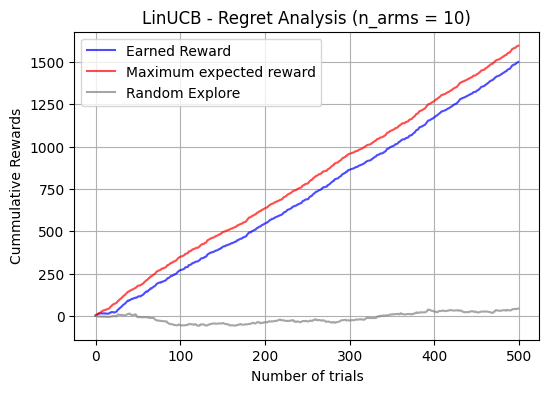

In [19]:
# LinUCB Result
y1 = np.cumsum(result_history)

# Best possible reward
# best_mean = np.argmax([bandit.mean for bandit in list_bandit])
# y2 = [i*best_mean for i in range(0,current_round-1)]

y2 = np.cumsum(best_expected_reward)

# Simulated 100% Explore
y3 = np.cumsum(random_reward)
# y1 = np.cumsum(result_history)

# Generate x values
x = range(len(y1))

# Plot the lines
plt.figure(figsize=(6, 4))
plt.plot(x, y1, label='Earned Reward', color='blue', alpha=0.7)
plt.plot(x, y2, label='Maximum expected reward', color='red', alpha=0.7)
plt.plot(x, y3, label='Random Explore', color='grey', alpha=0.7)

# Labels and title
plt.xlabel('Number of trials')
plt.ylabel('Cummulative Rewards')
plt.title('LinUCB - Regret Analysis (n_arms = 10)')
plt.legend()
plt.grid()

# Show the plot
plt.show()

# Hidden code (useless)

In [20]:
# Pull the arm
context, reward = bandit_list[bandit_best_ucb].return_reward(context)
print(f'Generated context: {context}')
print(f'Earned: {reward}')

# Update the UCB Matrix of the pulled arm
bandit_list[bandit_best_ucb].update_ucb_matrix(context, reward)

Generated context: [0.0754892  0.99889825 0.54668441 0.29154899 0.09371926]
Earned: 2.3685959016558673


In [21]:
print(bandit_list[0].feature_covariance_matrix)
print(bandit_list[0].weighted_reward_matrix)


[[107.94984004  41.1673529  -13.96463636  11.02837832  23.15757583]
 [ 41.1673529  148.14475917 -31.09285161  10.72890026   8.52134961]
 [-13.96463636 -31.09285161  96.88714157 -15.56632782 -15.38023318]
 [ 11.02837832  10.72890026 -15.56632782  82.2099774  -11.71400053]
 [ 23.15757583   8.52134961 -15.38023318 -11.71400053  82.29107541]]
[[ 306.33220339]
 [ 487.78002163]
 [-220.00651946]
 [  55.98030271]
 [ 181.6470431 ]]


In [22]:
# DEBUGGG
print(f'context: {context}')
print(f'resized: {context_resized}')

for i, bandit in enumerate(bandit_list):
    context, context_resized, inverted_feature_cov, estimated_weight, expected_reward, confidence_bound, upper_confidence_bound  = bandit.calculate_ucb_value(context=context)
    print(f'============ Bandit-{i} ============== number of pull: {bandit.number_pulled}')
    print(f'Inverted Feature Cov (Ab): {inverted_feature_cov}')
    print(f'True weight: {bandit.true_weight}')
    print(f'Estimated weight: {estimated_weight}')
    print(f'Expected Reward: {expected_reward}')
    print(f'Confidence Bound: {confidence_bound}')
    print(f'UCB Value: {upper_confidence_bound}')
    print()
    # print(f'feature Cov Matrix: {bandit.feature_covariance_matrix}')
    # print(f'weighted_reward: {bandit.weighted_reward_matrix}')
    # print(f'estimated weight: {bandit.estimated_weight}')
    # print()

context: [0.0754892  0.99889825 0.54668441 0.29154899 0.09371926]
resized: [[0.0754892  0.99889825 0.54668441 0.29154899 0.09371926]]
============ Bandit-0 ============== number of pull: 98
Inverted Feature Cov (Ab): [[ 1.11539483e-02 -2.81636184e-03 -3.78189829e-05 -1.57453635e-03
  -3.07840168e-03]
 [-2.81636184e-03  7.98492722e-03  2.17861912e-03 -2.02731009e-04
   3.44030445e-04]
 [-3.78189829e-05  2.17861912e-03  1.17459388e-02  2.27311042e-03
   2.30393775e-03]
 [-1.57453635e-03 -2.02731009e-04  2.27311042e-03  1.32270100e-02
   2.77177271e-03]
 [-3.07840168e-03  3.44030445e-04  2.30393775e-03  2.77177271e-03
   1.38078201e-02]]
True weight: [ 1.43045028  2.60392217 -0.98376189  0.16024638  1.3993683 ]
Estimated weight: [[ 1.40404336]
 [ 2.6039784 ]
 [-0.98732851]
 [ 0.1626179 ]
 [ 1.38123065]]
Expected Reward: [[2.3442015]]
Confidence Bound: [[0.12523615]]
UCB Value: [[2.5946738]]

============ Bandit-1 ============== number of pull: 34
Inverted Feature Cov (Ab): [[ 0.04286481 -

In [23]:
# DEBUG
linUCB.update_ucb_matrix(context=[0.5,1.2], reward=[1])

NameError: name 'linUCB' is not defined

In [ ]:
# Pull an arm
context,reward = linUCB.return_reward()
print(f'Context: {context}')
print(f'Reward: {reward}')

Context: [0.93135123 0.51710428]
Reward: -0.17244695800782972


In [ ]:
# Update feature covariance and weight reward matrix
linUCB.update_ucb_matrix(context=context, reward=reward)

NameError: name 'reward' is not defined

In [ ]:
# DEBUG
context, context_resized, inverted_feature_cov, estimated_weight, expected_reward, confidence_bound, upper_confidence_bound  = linUCB.calculate_ucb_value(context=[1.0, 1.2])
print(context)
print(context_resized)
print(inverted_feature_cov)
print(estimated_weight)
print(expected_reward)
print(confidence_bound)
print(upper_confidence_bound)


[1.0, 1.2]
[[1.  1.2]]
[[ 0.9070632  -0.22304833]
 [-0.22304833  0.46468401]]
[[0.18587361]
 [0.44609665]]
[[0.72118959]]
[[1.02024124]]
[[2.76167208]]


In [ ]:
# DEBUG
print(np.array([context]))
print(np.array([context]).transpose())

np.matmul(np.array([context]).transpose(), np.array([context]))
# print(np.array(np.newaxis, context).transpose())

[[1.  1.2]]
[[1. ]
 [1.2]]


array([[1.  , 1.2 ],
       [1.2 , 1.44]])

In [ ]:
linUCB.feature_covariance_matrix = 

## Update Matrices

In [ ]:
# For MAB it's
action_list = [] # Filled with the estimated reward

In [ ]:
# For Contextual Bandit we're gonna have
# NxM matrix
# N = Number of context or the feature
# M = Number of actions can be taken (bandit)
action = np.array([[], []], np.int32)

In [ ]:
sample_data = {'name': ['product A', 'product B', 'product C', 'product D'],
                'gender': pd.Series(['Male', 'Female', 'Male'], index=[0, 2, 3]),
                'location': pd.Series(['South', 'North', 'West', 'East'], index=[0, 1, 2, 3]),
               }

data = pd.DataFrame(data=sample_data, index=[0, 1, 2, 3])

# From
#         name	 gender	 location
# 0	 product A     Male	    South
# 1  product B	    NaN	    North
# 2	 product C	 Female	     West
# 3	 product D	   Male	     East

# To
#    Gender_Male  Gender_Female  Location_South  Location_North  Location_West  Location_East
# 0            1              0               1               0              0              0
# 1            0              0               0               1              0              0
# 2            0              1               0               0              1              0
# 3            1              0               0               0              0              1

In [ ]:
data

,name,gender,location
0,product A,Male,South
1,product B,NaN,North
2,product C,Female,West
3,product D,Male,East


In [ ]:
# One hot encode the data

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

encoded_data = encoder.fit_transform(data[['gender', 'location']])
encoded_columns = encoder.get_feature_names_out(['gender', 'location'])

one_hot_data = pd.DataFrame(encoded_data, columns=encoded_columns)

In [ ]:
data

,gender_Female,gender_Male,gender_nan,location_East,location_North,location_South,location_West
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
class contextual_bandits:
    def __init__(self, states, actions):

array([[1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0.]])

In [ ]:
data = [['tom', 10], ['nick', 15], ['juli', 14]]

df = pd.DataFrame(data, columns=[])

TypeError: object of type 'int' has no len()

In [ ]:
print(data.shape)
print(data.columns)
print(data["gender"].unique())

# Loop through the number of entry in the data
for i in range(data.shape[0]):
    print(f"{i}2")

def one_hot_encode():
    return

(4, 3)
Index(['name', 'gender', 'location'], dtype='object')
['Male' nan 'Female']
02
12
22
32


In [ ]:
A_cov = np.array([[0.0, 0.0],[0.0, 0.0]])
B_cov = np.array([[0.0, 0.0], [0.0, 0.0]])

In [ ]:
# context = [0.5, 1.2]
# context = np.array([[0.5, 1.2]])
context = np.random.randn(2)

A_cov += np.matmul(context.transpose(), context)
B_cov += np.outer(context, context)


In [ ]:

print(A_cov)
print(B_cov)

[[0.69287448 0.69287448]
 [0.69287448 0.69287448]]
[[0.06309534 0.19933923]
 [0.19933923 0.62977914]]
